In [1]:
import numpy as np

import adaptive_latents.input_sources.datasets as datasets
import adaptive_latents.plotting_functions as pf
import matplotlib.pyplot as plt
import prediction_regression_pipeline as prp
from importlib import reload



In [2]:
!echo $(hostname) $(git rev-parse --short HEAD)

tycho 7f3426b



## Prediction tables


In [4]:
runs = []

to_try = np.linspace(0, 0.25, 6*5)
for x in to_try:
    run = prp.PipelineRun(neural_lag=x)
    runs.append(run)



/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


  0%|          | 0/40 [00:00<?, ?it/s]

/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.4.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/jgould/miniconda3/envs/adaptive_latents/lib/python3.9/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


  0%|          | 0/40 [00:00<?, ?it/s]

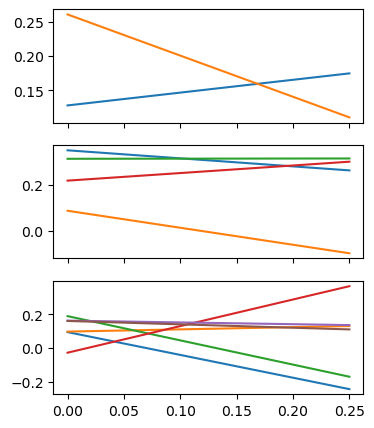

In [5]:

fig, axs = plt.subplots(nrows=3,squeeze=False, figsize=(4,5), sharex=True)
axs[0,0].plot(to_try, np.array([run.beh_correlations for run in runs]))
axs[1,0].plot(to_try, np.array([run.neural_correlations for run in runs]))
axs[2,0].plot(to_try, np.array([run.joint_correlations for run in runs]));



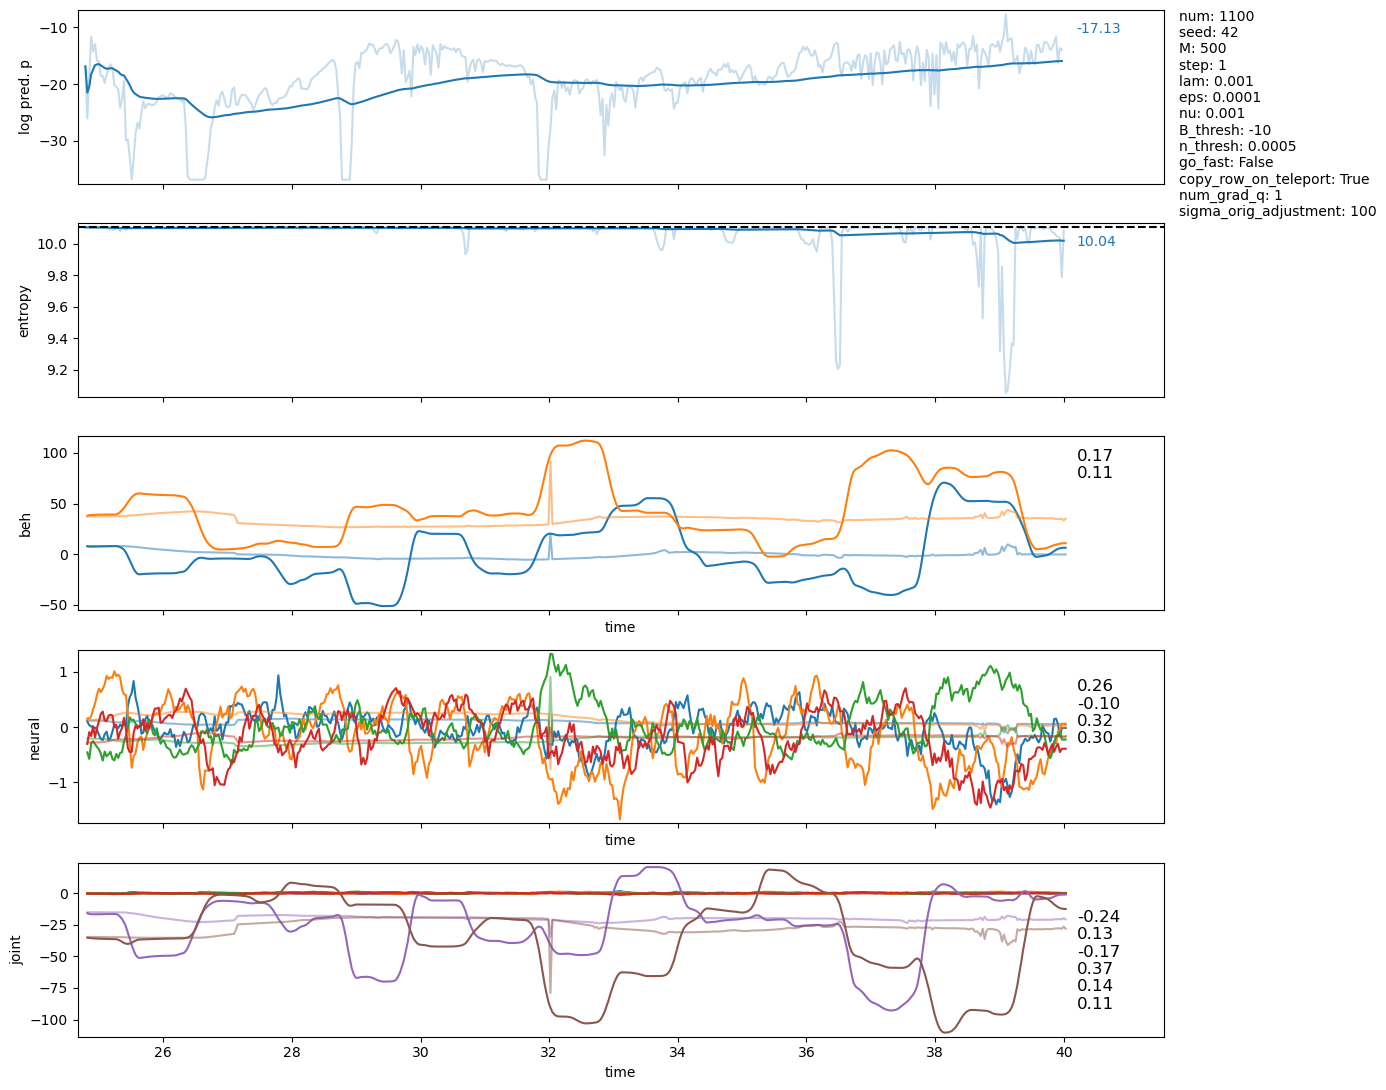

In [10]:
%matplotlib inline
run.plot_results()


Text(0, 0.5, 'ica')

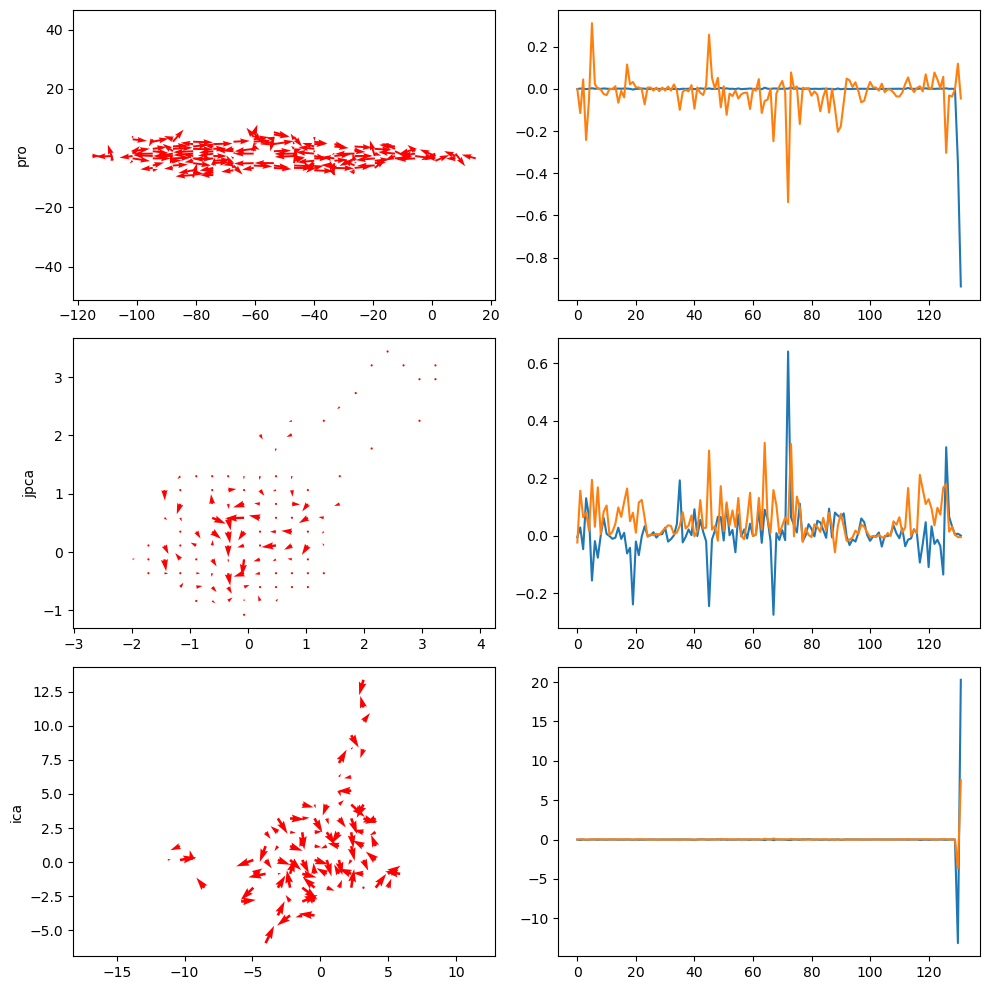

In [11]:
%matplotlib inline
 
fig, axs = plt.subplots(nrows=3, ncols=2, squeeze=False, layout='tight', figsize=(10, 10))
e1, e2 = np.zeros(6), np.zeros(6)
e1[0] = 1
e2[1] = 1

for idx, latents in enumerate([run.pro_latents, run.jpca_latents, run.ica_latents]):
    ax: plt.Axes = axs[idx, 0]
    # ax.scatter(latents[:,0], latents[:,1], s=5)

    d_latents = np.diff(latents, axis=0)
    d_latents = d_latents / np.linalg.norm(d_latents, axis=1)[:, np.newaxis]
    ax.quiver(latents[:-1] @ e1, latents[:-1]@e2, d_latents@e1, d_latents@e2, scale=1 / 20, units='dots', alpha=0)
    x1, x2, y1, y2 = ax.axis()
    x_points = np.linspace(x1, x2, 21)
    y_points = np.linspace(y1, y2, 21)
    # mgrid = np.meshgrid(*[np.linspace(latents[:, i].min(), latents[:, i].max(), 10) for i in range(2)])
    origins = []
    arrows = []
    for i in range(len(x_points) - 1):
        for j in range(len(y_points) - 1):
            proj_1 = (latents[:-1] @ e1)
            proj_2 = (latents[:-1] @ e2)
            s = (x_points[i] <= proj_1) & (proj_1 < x_points[i + 1]) & (y_points[j] <= proj_2) & (
                    proj_2 < y_points[j + 1])
            if s.sum():
                arrow = d_latents[s].mean(axis=0)
                arrow = arrow / np.linalg.norm(arrow)
                arrows.append(arrow)
                origins.append([x_points[i:i + 2].mean(), y_points[j:j + 2].mean()])
    origins, arrows = np.array(origins), np.array(arrows)
    ax.quiver(origins[:, 0], origins[:, 1], arrows @ e1, arrows @ e2, scale=1 / 20, units='dots', color='red')

    ax.axis('equal')

axs[0, 1].plot(run.pro.inverse_transform(e1, 2))
axs[0, 1].plot(run.pro.inverse_transform(e2, 2))
axs[0, 0].set_ylabel('pro')

axs[1, 1].plot(run.pro.inverse_transform(run.jpca.inverse_transform(e1, 2), 2))
axs[1, 1].plot(run.pro.inverse_transform(run.jpca.inverse_transform(e2, 2), 2))
axs[1, 0].set_ylabel('jpca')

axs[2, 1].plot(run.pro.inverse_transform(run.ica.inverse_transform(e1, 2), 2))
axs[2, 1].plot(run.pro.inverse_transform(run.ica.inverse_transform(e2, 2), 2))
axs[2, 0].set_ylabel('ica')

In [8]:
assert isinstance(d, datasets.Zong22Dataset)
desired_pattern = np.mean(latents[-101:-1], axis=0)
current_pattern = latents[-1]
desired_stim = desired_pattern - current_pattern

desired_pattern = (desired_stim @ pro.Q.T)[:d.neural_data.a.shape[-1]]

near_zero = np.abs(desired_stim) < 100
print(near_zero.sum())
desired_stim[near_zero] = np.nan


fig, ax = plt.subplots()
d.show_stim_pattern(ax, np.abs(desired_pattern))


NameError: name 'd' is not defined

In [ ]:
fig, ax = plt.subplots()

latents = jpca_latents

dim_1, dim_2 = 0,1
pf.plot_history_with_tail(ax, latents, dim_1=dim_1, dim_2=dim_2)
means = np.mean(latents, axis=0)

ax.arrow(latents[-1,dim_1], latents[-1,dim_2], means[dim_1] - latents[-1,dim_1], means[dim_2] - latents[-1,dim_2], zorder=5, head_width=.1, color='k')

ax.axis('equal');



## Intro video

In [ ]:
d = datasets.Odoherty21Dataset()

tail_length = 5  # seconds

with AnimationManager(n_cols=2, n_rows=1, figsize=(10, 5)) as am:
    for current_t in np.linspace(100, 110, 51):
        am.axs[0,0].cla()

        n_columns = np.floor(tail_length / d.bin_width).astype(int)
        idx = np.nonzero(~(d.neural_data.t < current_t))[0][0]
        
        
        am.axs[0,0].imshow(d.neural_data.a[idx-n_columns:idx,0,:].T, aspect='auto', interpolation='none', extent=[current_t - tail_length, current_t, d.neural_data.a.shape[2], 0])



        old_lims = am.axs[0,1].axis()
        am.axs[0,1].cla()
        am.axs[0,1].axis('off')
        
        s = ((current_t - tail_length) < d.behavioral_data.t) & (d.behavioral_data.t < current_t)
        am.axs[0,1].plot(d.behavioral_data.a[s,0,0], d.behavioral_data.a[s,0,1])
        pf.use_bigger_lims(am.axs[0,1], old_lims)
        
        am.grab_frame()